In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_data.head()
test_data.shape
test_ID = test_data['Id']
test_data = test_data.drop('Id',axis=1)

In [3]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv").drop('Id', axis = 1)
train_data.head()
train_data.shape
prices = train_data['SalePrice']

In [4]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
ntrain
#ntest

1460

In [5]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

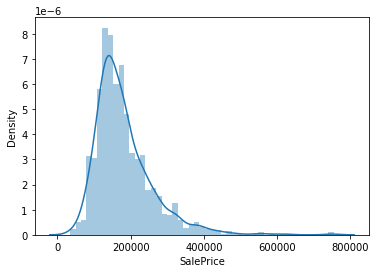

In [7]:
import seaborn as sns
sns.distplot(train_data['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

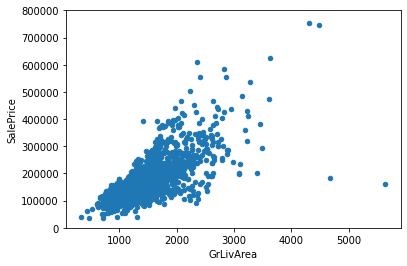

In [8]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'],train_data[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

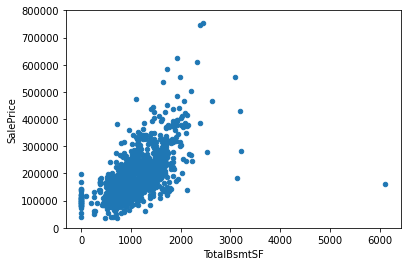

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'],train_data[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

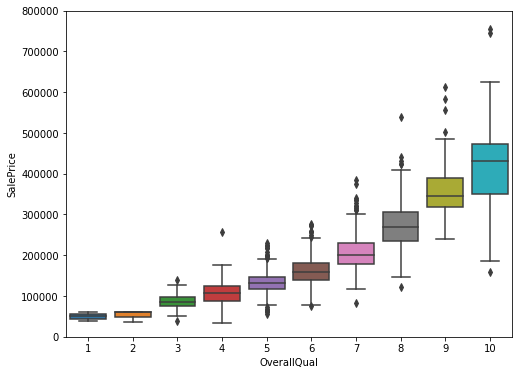

In [10]:
import matplotlib.pyplot as plt
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'],train_data[var]],axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

<AxesSubplot:>

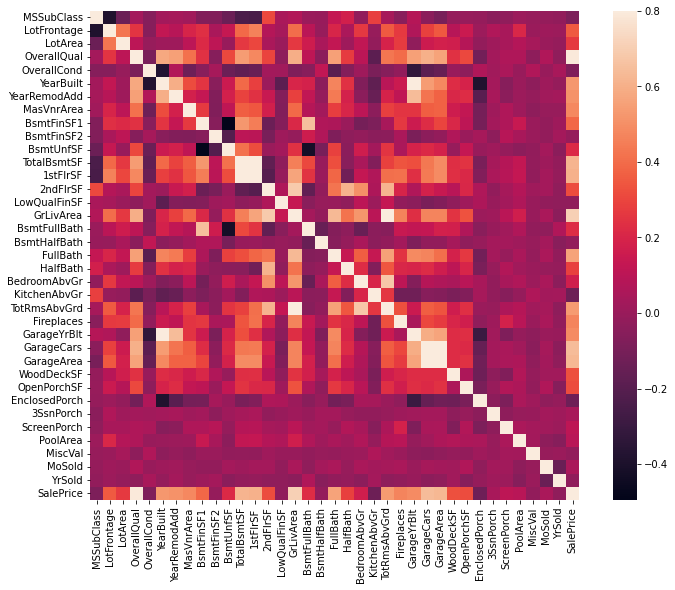

In [11]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

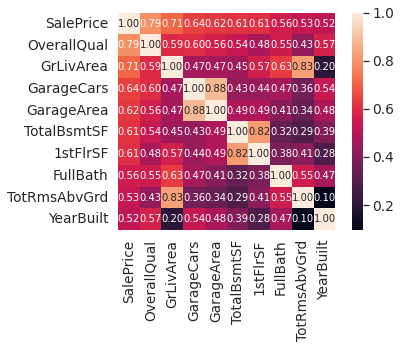

In [12]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

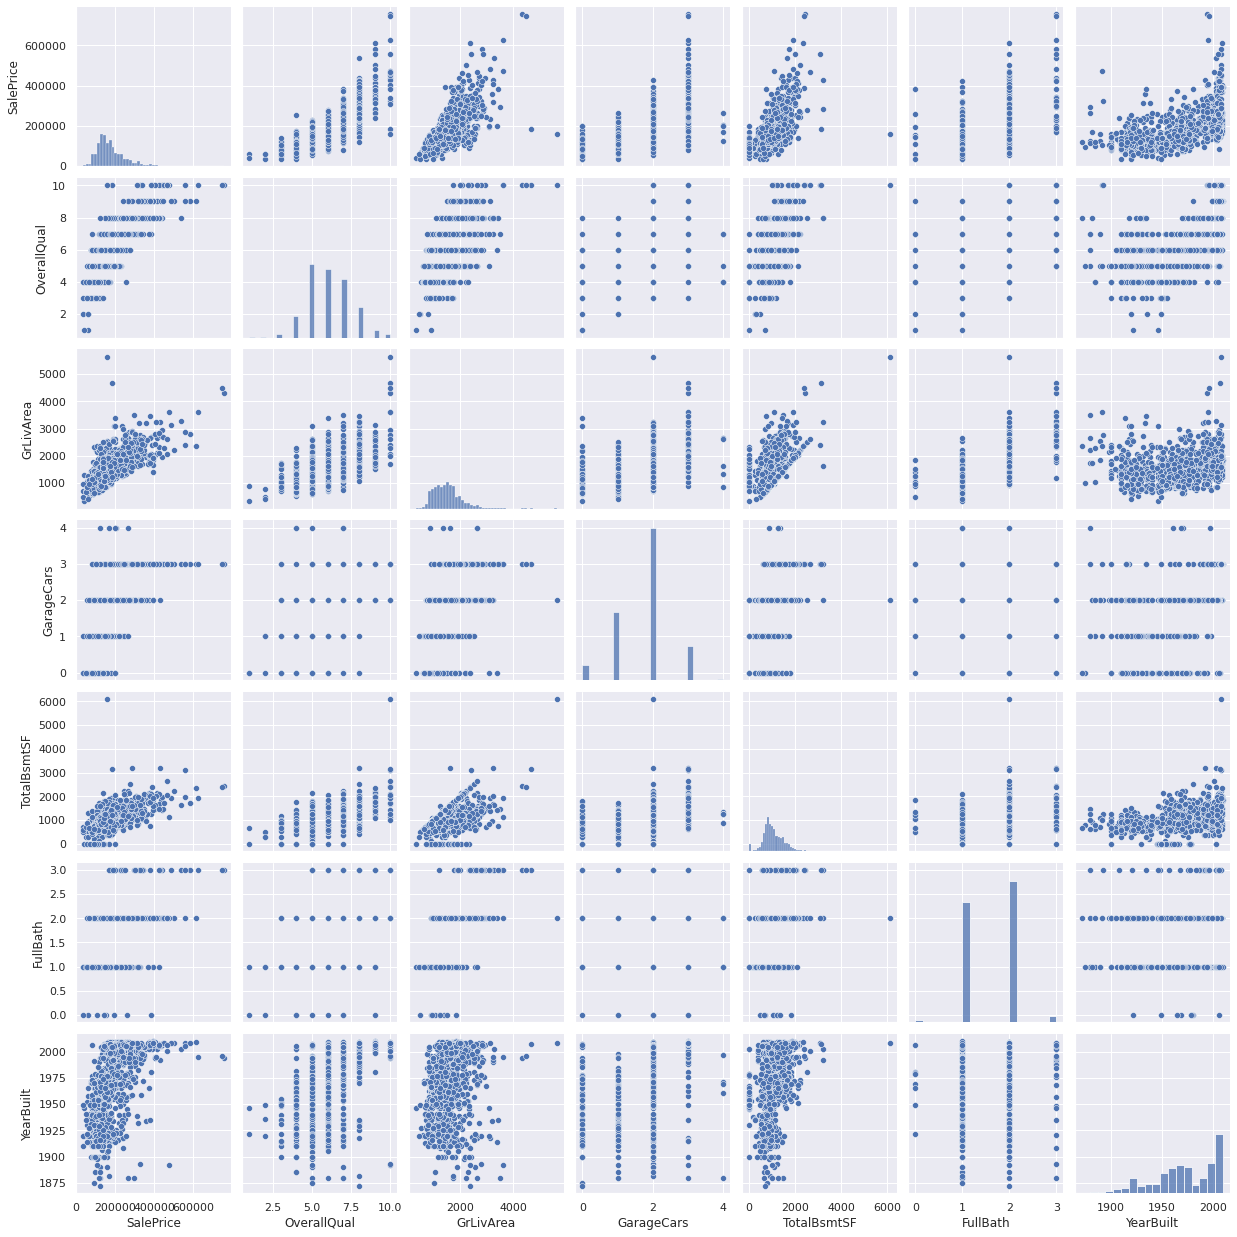

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], height = 2.5)
plt.show();

In [14]:
total_train = train_data.isnull().sum().sort_values(ascending=False)
percent_train = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False)
missing_data_train = pd.concat([total_train,percent_train],axis=1, keys =['Total','Percent'])
missing_data_train.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [15]:
total_test = test_data.isnull().sum().sort_values(ascending=False)
percent_test = (test_data.isnull().sum()/test_data.isnull().count()*100).sort_values(ascending=False)
missing_data_test = pd.concat([total_test,percent_test],axis=1, keys =['Total','Percent'])
missing_data_test.head(40)

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127
GarageQual,78,5.346127
GarageCond,78,5.346127


In [16]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(train_data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


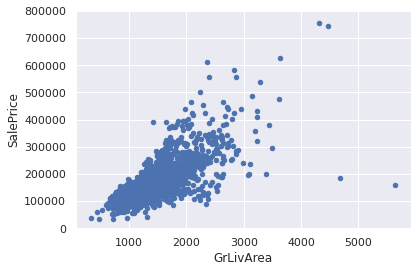

In [18]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [19]:
train_data[train_data['GrLivArea']>4000].index

Int64Index([523, 691, 1182, 1298], dtype='int64')

In [20]:
print(train_data.iloc[523]['SalePrice'])
print(train_data.iloc[691]['SalePrice'])
print(train_data.iloc[1182]['SalePrice'])
print(train_data.iloc[1298]['SalePrice'])

184750
755000
745000
160000


In [21]:
#train_data = train_data.drop(523)
#train_data = train_data.drop(1298)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


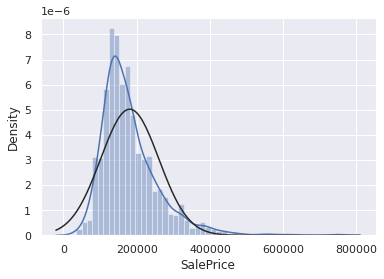

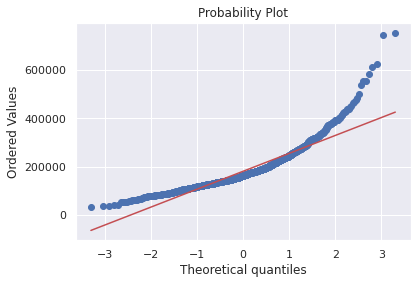

In [22]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train_data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt) 

In [23]:
train_data['SalePrice'] = np.log(train_data['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


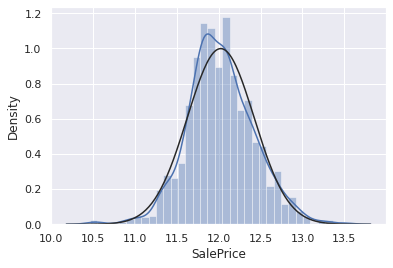

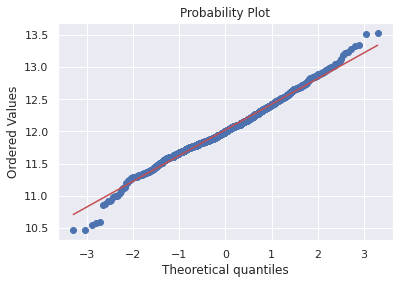

In [24]:
sns.distplot(train_data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


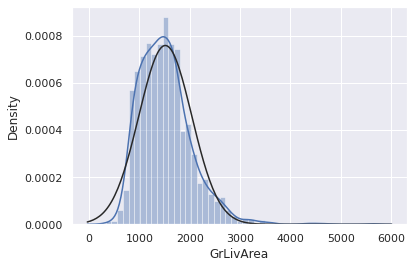

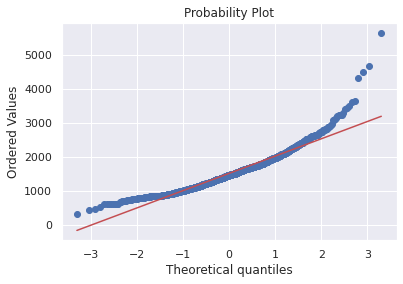

In [25]:
sns.distplot(train_data['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt) 

In [26]:
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


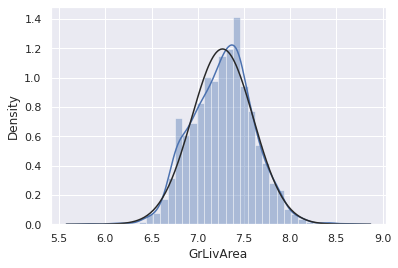

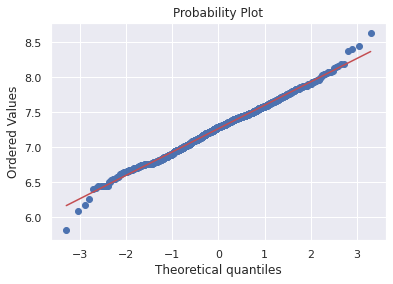

In [27]:
sns.distplot(train_data['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


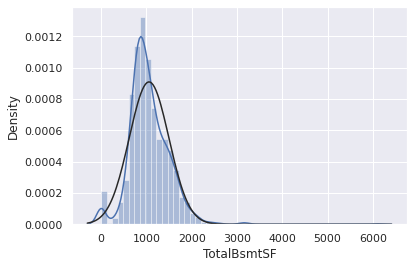

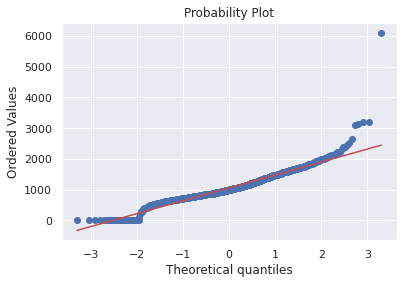

In [28]:
sns.distplot(train_data['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)

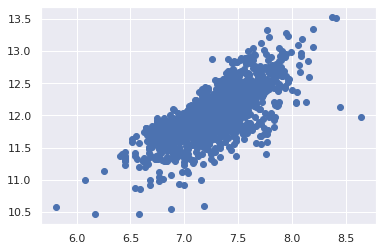

In [29]:
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'])

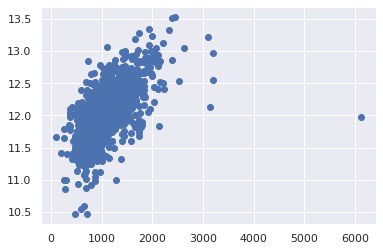

In [30]:
plt.scatter(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], 
            train_data[train_data['TotalBsmtSF']>0]['SalePrice'])

In [31]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [32]:
#train_data = pd.get_dummies(train_data)

In [33]:
all_data = pd.concat((train_data, test_data), ignore_index = True).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("All data size: {}".format(all_data.shape))

All data size: (2919, 79)


In [34]:
all_data_na = (all_data.isnull().sum() / len(all_data))*100
all_data_na = all_data_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head()

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797


In [35]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [36]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [37]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

In [38]:
for n in ('GarageFinish', 'GarageQual', 'GarageCond', 'GarageType'):
    all_data[n] = all_data[n].fillna('None')

In [39]:
for n in ('BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1'):
    all_data[n] = all_data[n].fillna('None')

In [40]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [41]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#all_data['MSZoning'].mode()[0]

In [42]:
all_data['Functional'] = all_data['Functional'].fillna('Typical')

In [43]:
for n in ('BsmtFullBath', 'BsmtHalfBath'):
    all_data[n] = all_data[n].fillna(0)

In [44]:
all_data['Utilities'].unique()
all_data.loc[all_data['Utilities']=='NoSeWa']
all_data = all_data.drop(['Utilities'], axis=1)

In [45]:
all_data.loc[all_data['Exterior2nd'].isnull()]#Exterior1st
for n in ('Exterior1st','Exterior2nd'):
    print(all_data[n].mode()[0])
    all_data[n] = all_data[n].fillna(all_data[n].mode()[0])

VinylSd
VinylSd


In [46]:
for n in ('TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2','BsmtFinSF1', 'GarageCars', 'GarageArea'):
    all_data[n] = all_data[n].fillna(0)

In [47]:
all_data['Electrical'].unique()
all_data.loc[all_data['Electrical'].isna()]
all_data['Electrical'].isna().sum()
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['Electrical'].mode()[0]

'SBrkr'

In [48]:
all_data['SaleType'].isna().sum()
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
print('Mode for SaleType: {}'.format(all_data['SaleType'].mode()[0]))
all_data['KitchenQual'].isna().sum()
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
print('Mode for KitchenQual: {}'.format(all_data['KitchenQual'].mode()[0]))

Mode for SaleType: WD
Mode for KitchenQual: TA


In [49]:
all_data_na = (all_data.isnull().sum() / len(all_data))*100
all_data_na = all_data_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head()

,Missing Ratio
MSSubClass,0.0
BedroomAbvGr,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0


In [50]:
#transform numerical values into categorical
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [51]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [52]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [53]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

from scipy.stats import skew
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [54]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [55]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [56]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print('Test size: {}'.format(test.shape))
#ntrain
#train.shape
all_data.shape

Test size: (1459, 221)


(2919, 221)

In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(train,train_data['SalePrice'])
predictions = reg.predict(test)

In [58]:
ans = pd.DataFrame()
ans['Id'] = test_ID
ans['SalePrice'] = predictions*10000
ans.to_csv('submission.csv',index=False)
print('Saved')

Saved
